<a href="https://colab.research.google.com/github/derek881107/Advanced-Regression-Techniques-A-Comprehensive-Guide-to-Predicting-House-Prices/blob/main/Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

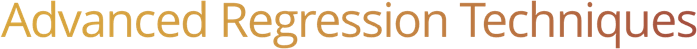



##🏡 Advanced Regression Techniques: Because House Prices Won't Predict Themselves! 🧠

Welcome to the world of predicting house prices, where spreadsheets meet science, and regression models reign supreme. This project takes you on a thrilling ride of data preprocessing, model stacking, and genetic feature selection, proving that machine learning can be both smart and fun.

Check out the linked video for a deeper dive, and let’s connect to share insights and experiments. Together, we can push the boundaries of what machine learning can achieve! 💡✨

Introdution Video Link: https://www.youtube.com/watch?v=a5CpIumG6Aw

#🎯 What's the Deal Here?
**Prepping Like a Pro:**

Missing data? No problem! We impute, we encode, and we drop anything that's 50% empty like it's a bad habit.
Got categorical variables? Boom! They’re now numbers thanks to LabelEncoder.

**Getting Fancy with Features:**

A genetic algorithm (yes, inspired by evolution!) picks the best features. Darwin would approve.

**Model Showdown:**

It's like "America’s Next Top Model" but for regressors:
LinearRegression for the purists.
RandomForest for the nature lovers 🌳.
GradientBoosting for the overachievers.
SVR for the rebels.
DecisionTree for those who like branching out.
The stacking model swoops in as the grand finale, blending all the predictions into one masterpiece.

**Tuning It Like a Pro Chef:**

Using GridSearchCV, we find the perfect seasoning (hyperparameters) for our stacking model. Yum!
Proving We're Awesome:

ROC curves and AUC values put all the models head-to-head in an ultimate fight for glory. Spoiler: the stacking model usually wins.
Bonus: A Q-Q plot because why not check if your predictions are norm-al?

**Visuals that Pop:**

Missing data? We show it off with bar plots.
Predictions? We compare them across models with gorgeous line graphs.
AUC? Oh, we curve it like Beckham.

# 💡 Why Should You Care?
If you've ever thought:

"What’s the best way to predict house prices?"
"How can I make feature selection as exciting as a sci-fi movie?"
"Can machine learning be… fun?"
Then this project is for you.

# 🛠 Installation Instructions
Install the required libraries by running:


pip install deap xgboost scikit-learn seaborn matplotlib

# 🚀 How It Works
Upload your datasets.
Let the script handle missing data, feature encoding, and model training.
Watch as the stacking model combines predictions like a magician pulling a rabbit from a hat.
Collect your winning submission file (submission.csv) and take a bow. 🏆

# 📊 Results You Can Brag About
Bar plots? Check.
ROC curves? Double-check.
Predictions that’ll wow your stakeholders? Oh yeah.

# Who’s This For? 🤔
Anyone who wants to:

Predict house prices with style and flair.
Learn stacking models, genetic algorithms, and hyperparameter tuning.
Have a good laugh while coding.
So buckle up and dive into the world of machine learning meets real estate. After all, predicting house prices isn’t just a task—it’s an adventure. 🎢

In [ ]:
# Step 1: Input
!pip install deap xgboost scikit-learn seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Input
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc
from deap import base, creator, tools, algorithms
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 3: upload Google Colab
from google.colab import files
uploaded = files.upload()

# loading datasets
train_path = 'hw4train.csv'
test_path = 'hw4test.csv'

train = pd.read_csv(train_path, na_values="NA")
test = pd.read_csv(test_path, na_values="NA")

Saving hw4test.csv to hw4test.csv
Saving hw4train.csv to hw4train.csv


In [ ]:
# Step 4: take out 'SalePrice' feature
target = 'SalePrice'
y = train[target]
train.drop(columns=[target], inplace=True)

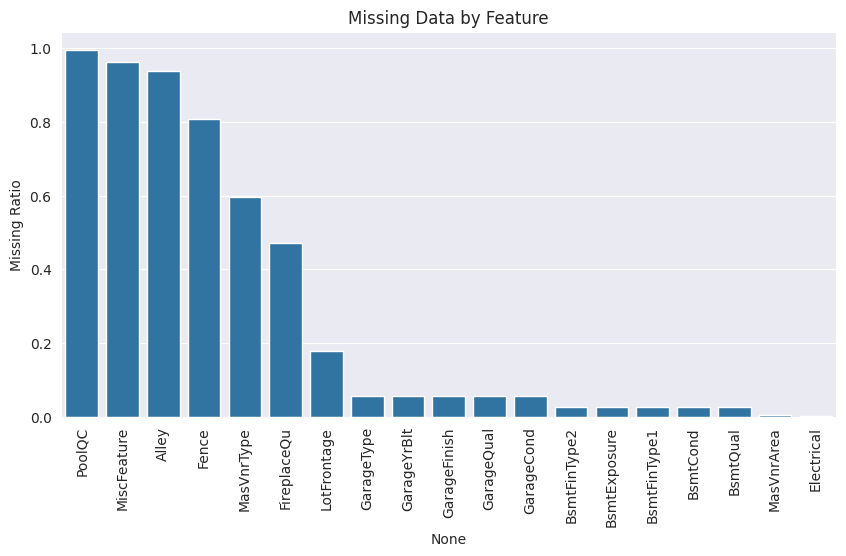

In [ ]:
# Step 5: processing missing data
# compute missing ratio
missing_train = train.isnull().mean()
missing_test = test.isnull().mean()

# keeping missing ratio <50%
train = train.loc[:, missing_train < 0.5]
test = test.loc[:, train.columns]

# visualize remain columns
missing_data = pd.DataFrame({'Missing Ratio': missing_train[missing_train > 0]}).sort_values(by='Missing Ratio', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_data.index, y=missing_data['Missing Ratio'])
plt.xticks(rotation=90)
plt.title("Missing Data by Feature")
plt.show()

In [ ]:
# Step 6: make up blanking data
categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['number']).columns

# make up attribute data
train[categorical_cols] = train[categorical_cols].fillna('None')
test[categorical_cols] = test[categorical_cols].fillna('None')

# make up continuous data
imputer = SimpleImputer(strategy='mean')
train[numerical_cols] = imputer.fit_transform(train[numerical_cols])
test[numerical_cols] = imputer.transform(test[numerical_cols])

In [ ]:
# Step 7: using Label Encoder
for col in categorical_cols:
    encoder = LabelEncoder()
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    encoder.fit(combined_data)
    train[col] = encoder.transform(train[col].astype(str))
    test[col] = encoder.transform(test[col].astype(str))

In [ ]:
# Step 8: Apply a logarithmic transformation to SalePrice.
y_log = np.log1p(y)

In [ ]:
# Step 9: feature selection(genetic_feature)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def genetic_feature_selection(X, y):
    def fitness(individual):
        selected_features = [bool(gene) for gene in individual]
        if not any(selected_features):
            return float('inf'),
        X_selected = X[:, selected_features]
        model = RandomForestRegressor(n_estimators=10, random_state=42)
        scores = cross_val_score(model, X_selected, y, cv=3, scoring='neg_mean_squared_error')
        return -scores.mean(),

    n_features = X.shape[1]
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=20)
    algorithms.eaSimple(population, toolbox, cxpb=0.6, mutpb=0.1, ngen=10, verbose=False)
    best_individual = tools.selBest(population, k=1)[0]
    return [bool(gene) for gene in best_individual]

selected_features = genetic_feature_selection(train.values, y_log)
train = train.iloc[:, selected_features]
test = test.iloc[:, selected_features]

print(f"Selected Features: {train.columns.tolist()}")

Selected Features: ['Id', 'MSSubClass', 'Street', 'Utilities', 'Condition2', 'HouseStyle', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MoSold', 'SaleCondition']


In [ ]:
pip install scikit-learn

In [ ]:
base_models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=50, random_state=42),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

stacked_train_preds = np.zeros((train.shape[0], len(base_models)))
stacked_test_preds = np.zeros((test.shape[0], len(base_models)))

for idx, (name, model) in enumerate(base_models.items()):
    model.fit(train, y_log)
    stacked_train_preds[:, idx] = model.predict(train)
    stacked_test_preds[:, idx] = model.predict(test)

    # store prediction by individuals
    test['Id'] = range(1, len(test) + 1)
    submission = pd.DataFrame({
        'Id': test['Id'],
        'SalePrice': np.expm1(stacked_test_preds[:, idx])  # Inverse Log Transformation
    })
    submission.to_csv(f'{name}_predictions.csv', index=False)
    print(f"{name} predictions saved to {name}_predictions.csv")

LinearRegression predictions saved to LinearRegression_predictions.csv
RandomForest predictions saved to RandomForest_predictions.csv
GradientBoosting predictions saved to GradientBoosting_predictions.csv
SVR predictions saved to SVR_predictions.csv
DecisionTree predictions saved to DecisionTree_predictions.csv


In [ ]:
# Step 10: hyperparamater tunning
stacked_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

grid = GridSearchCV(stacked_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid.fit(stacked_train_preds, y_log)
best_stacked_model = grid.best_estimator_

print(f"Stacked Model Best Params: {grid.best_params_}")

# prediction result
final_pred_log = best_stacked_model.predict(stacked_test_preds)
final_pred = np.expm1(final_pred_log)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Stacked Model Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Step 11: store result
test['Id'] = range(1, len(test) + 1)
submission = pd.DataFrame({ 'Id': test['Id'],
                           'SalePrice': final_pred })
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

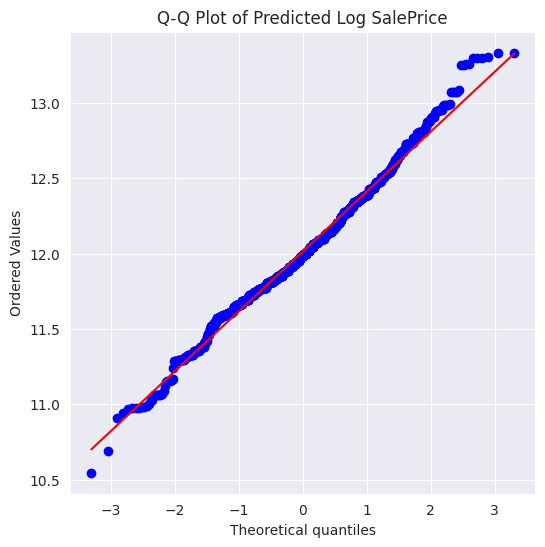

In [ ]:
# Step 12: draw Q-Q
plt.figure(figsize=(6, 6))
stats.probplot(final_pred_log, dist="norm", plot=plt)
plt.title("Q-Q Plot of Predicted Log SalePrice")
plt.show()



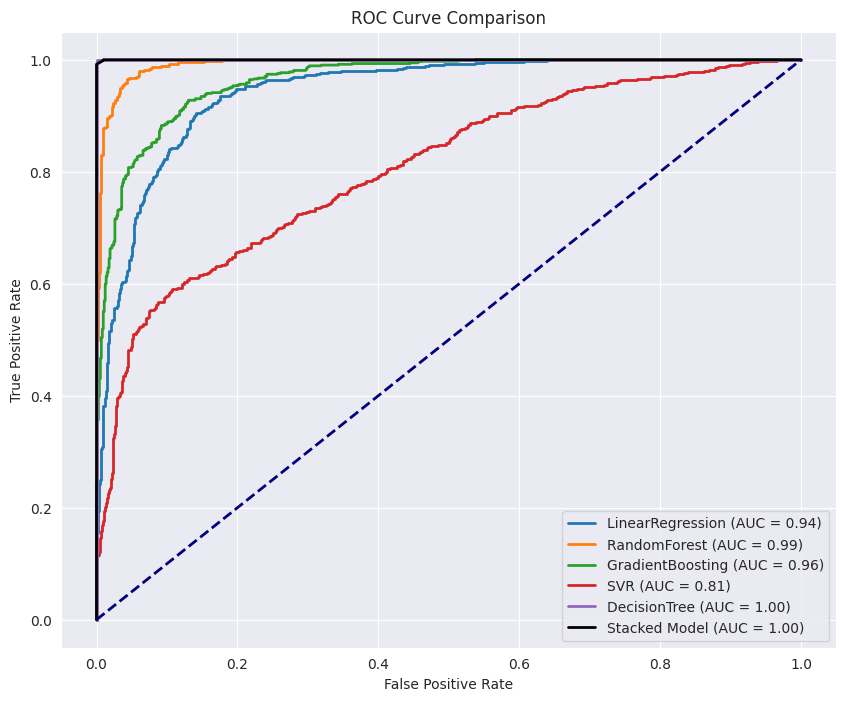

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

# Step 13: compared Stacking Model and Base Models to AUC and ROC Curve
def plot_roc_comparison(y_true, models, stacked_train_preds, base_train_preds):
    """
    Drawing Stacking Model and Basing models' ROC curves

    :param y_true: True Target Value
    :param models: Dictionary of Base Model Names and Instances
    :param stacked_train_preds: Training Predictions of the Stacking Model
    :param base_train_preds: Training Predictions of Base Models
    """
    plt.figure(figsize=(10, 8))

    threshold = np.percentile(y_true, 50)
    y_true_binary = (y_true >= threshold).astype(int)


    for idx, (name, _) in enumerate(models.items()):
        fpr, tpr, _ = roc_curve(y_true_binary, base_train_preds[:, idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    fpr_stacked, tpr_stacked, _ = roc_curve(y_true_binary, stacked_train_preds)
    roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
    plt.plot(fpr_stacked, tpr_stacked, color='black', lw=2, label=f'Stacked Model (AUC = {roc_auc_stacked:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()


stacked_train_preds_single = best_stacked_model.predict(stacked_train_preds)
plot_roc_comparison(
    y_true=y_log,
    models=base_models,
    stacked_train_preds=stacked_train_preds_single,
    base_train_preds=stacked_train_preds
)


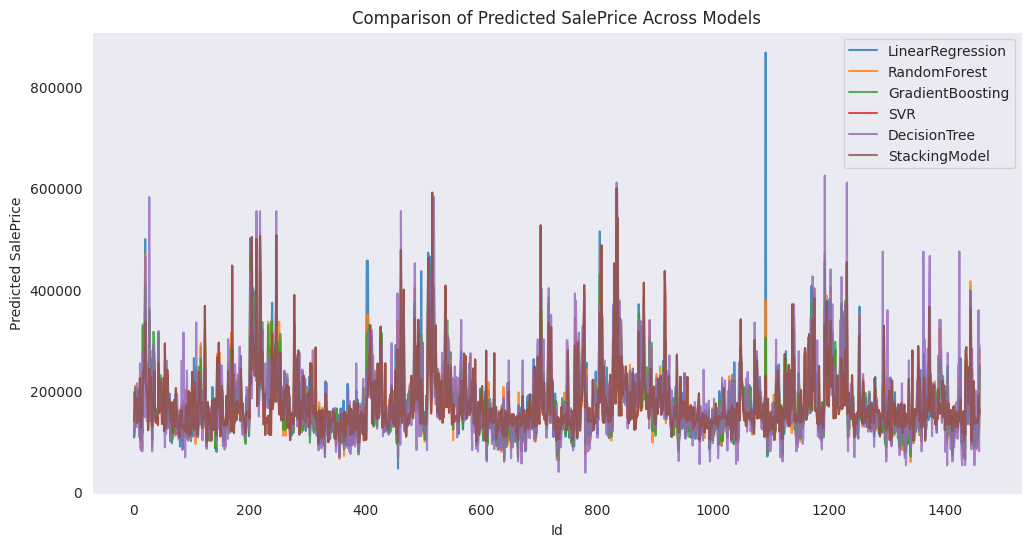

In [ ]:
# Step 12: data visualization
import matplotlib.pyplot as plt

# collecting models' result
model_predictions = {}
for idx, (name, _) in enumerate(base_models.items()):
    model_predictions[name] = np.expm1(stacked_test_preds[:, idx])  # Inverse Log Transformation

# collecting stacking model's result
model_predictions['StackingModel'] = final_pred


results_df = pd.DataFrame(model_predictions)
results_df['Id'] = range(1, len(test) + 1)


plt.figure(figsize=(12, 6))
for model in model_predictions.keys():
    plt.plot(results_df['Id'], results_df[model], label=model, alpha=0.8)

plt.xlabel("Id")
plt.ylabel("Predicted SalePrice")
plt.title("Comparison of Predicted SalePrice Across Models")
plt.legend()
plt.grid()
plt.show()
